In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [2]:
df = pd.read_csv('2022_02_08-02_30_31_AM.csv')

In [3]:
df.describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,13730000,5510000,310000,13720000,13680000,13720000
unique,1373,248,26,321,595,13
top,638744a4-b0ae-4166-8cb6-5c063c862036,$0.00,$6.75,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U3dlYXRzaGlydA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,10000,240000,30000,200000,90000,3910000


*Here, I can see that not all entries of uuid are unique but we know that it is primary key, so there might be duplicacy, let's check it out!*

In [4]:
# Taking example to understand better
df.loc[df['uuid']== "638744a4-b0ae-4166-8cb6-5c063c862036"]

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
470,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
3106,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
4030,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
5391,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
...,...,...,...,...,...,...
13723262,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
13723919,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
13726648,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
13728612,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M


In [5]:
df[df.duplicated()]

,uuid,price_string,price_string_unf,product_type,level_1,category
12,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
89,4310e8b0-1437-4020-b761-bedc10c1ac66,NaN,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
100,544416c3-4845-4427-b27b-d3ca9beca970,$34.00,NaN,U3Vuc2NyZWVu,VmVnYW4gU3Vuc2NyZWVu,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
125,7b268906-bd3d-409e-b4b1-426c859bc3ad,$6.99,NaN,U3lydXBz,U3lydXBz,Z3JvY2VyaWVz
127,fc7ab7d3-7e82-4efa-b87a-c2ea0ea8e48a,NaN,NaN,UGV0IGNvbGxhcnM,RG9nIGNvbGxhcnM,cGV0IHN1cHBsaWVz
...,...,...,...,...,...,...
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,$69.99,NaN,Um9vbSBkZWNvcg,UGxhbnRlcnMvVmFzZXM,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz
13729998,25677eee-c26b-4abf-bd10-ca77a800ba26,NaN,NaN,U2F1Y2U,QkJRIFNhdWNl,Z3JvY2VyaWVz


In [6]:
# Check for duplicacy
df.duplicated().sum()

13728627

In [7]:
# Dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
df

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
...,...,...,...,...,...,...
7751,a1170e06-ec36-4530-82a2-0374969a059e,$14.49,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz
8538,b282d3e4-9d7a-48c9-9d68-4856c51f545b,$12.99,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz
8788,62785956-705e-47db-bd0e-764575333724,NaN,NaN,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
8873,b4799645-56ab-4b83-8666-1b79cbf6da17,NaN,NaN,WW9nYSBNYXRz,RWNvIGZyaWVuZGx5IHlvZ2EgbWF0cw,SGVhbHRo


In [9]:
df.describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,1373,551,31,1372,1368,1372
unique,1373,248,26,321,595,13
top,638744a4-b0ae-4166-8cb6-5c063c862036,$0.00,$6.75,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U3dlYXRzaGlydA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,1,24,3,20,9,391


<AxesSubplot:>

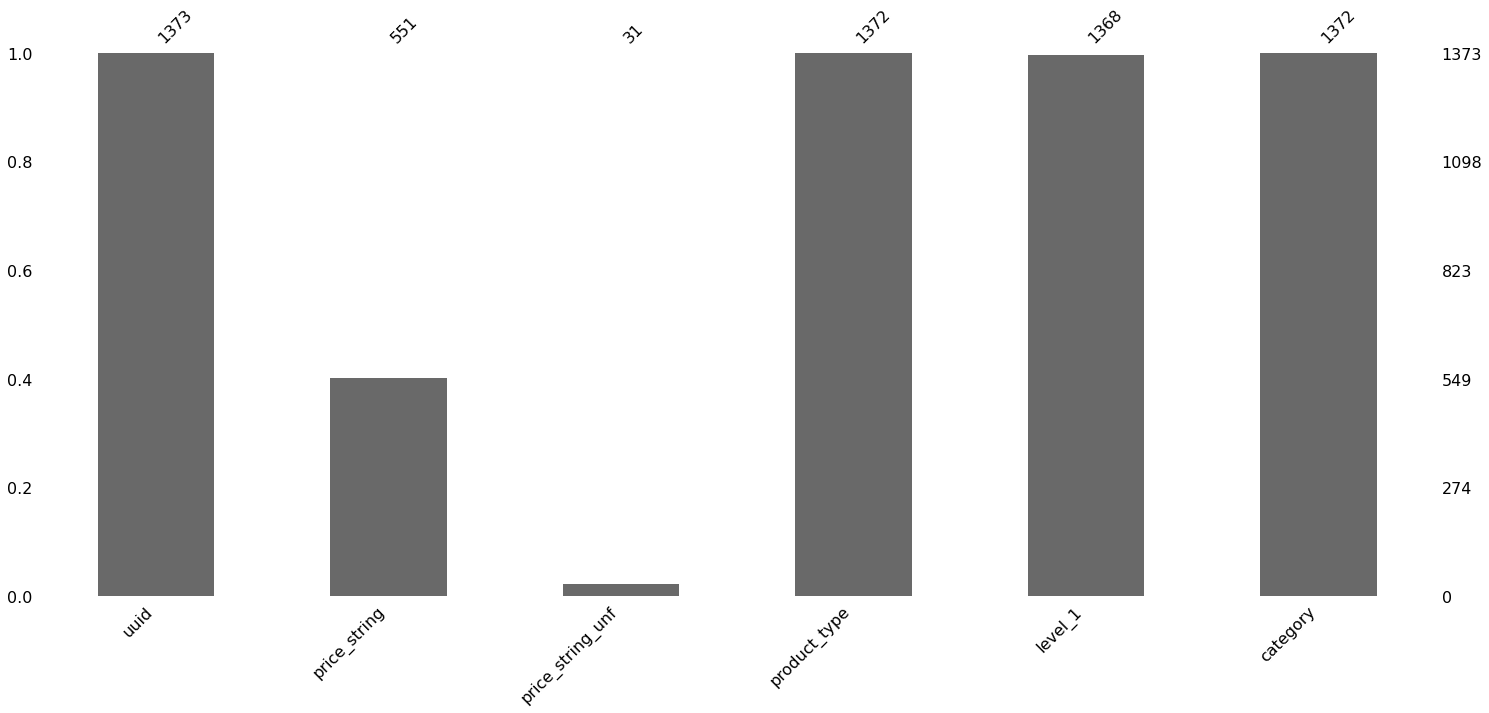

In [10]:
# Visualising no of entries in eacj column to get idea of none rows

# df.count().plot(kind='bar')
msno.bar(df)

In [11]:
# Check for null entries
df.isna().sum()

uuid                   0
price_string         822
price_string_unf    1342
product_type           1
level_1                5
category               1
dtype: int64

<AxesSubplot:>

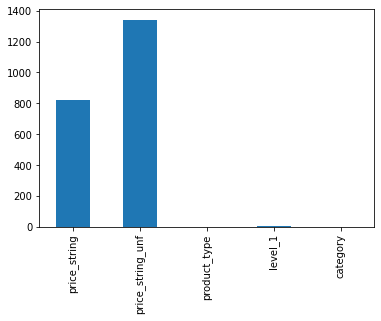

In [12]:
# Visualising null entries in each column
df.isna().sum()[df.isna().sum() > 0].plot(kind='bar')

### Task 1. Products with prices as NULL (Products without prices)

In [13]:
# Products details of products whose price is null(missing)
df[df['price_string'].isnull()]

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,NaN,NaN,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,NaN,NaN,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
16,7bad39f5-74b9-4611-afb9-46fb135190cd,NaN,NaN,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
7024,c174d758-aa8f-4c1c-afa9-2ded6e6b6a0d,NaN,NaN,VGVh,VGVhYmFncw,Z3JvY2VyaWVz
7131,0c4f4319-4a18-4edc-a40d-133b3f4cef5c,NaN,NaN,QnJ1c2hlcw,RGlzaCBicnVzaA,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
7456,2d4deea7-b7c2-4342-8488-337c5eacaa84,NaN,NaN,bWVucyBzd2VhdGVycw,SG9vZGll,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
8788,62785956-705e-47db-bd0e-764575333724,NaN,NaN,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


In [14]:
# Products uuid whose price is null(misssing)
df[df['price_string'].isnull()]['uuid']

0       638744a4-b0ae-4166-8cb6-5c063c862036
1       ab313969-02cc-48b2-9daf-0054efb70b92
5       389d9f75-cc3f-4bd2-94f7-93e381a3bed5
13      1f2766ec-0a27-43f8-b28b-77a44492ead1
16      7bad39f5-74b9-4611-afb9-46fb135190cd
                        ...                 
7024    c174d758-aa8f-4c1c-afa9-2ded6e6b6a0d
7131    0c4f4319-4a18-4edc-a40d-133b3f4cef5c
7456    2d4deea7-b7c2-4342-8488-337c5eacaa84
8788    62785956-705e-47db-bd0e-764575333724
8873    b4799645-56ab-4b83-8666-1b79cbf6da17
Name: uuid, Length: 822, dtype: object

### Task 2. a) Count of products  without and with prices in each Product Type

In [37]:
# Count of products with prices in each Product Type

df.groupby(df['product_type'])['price_string'].count()
# df['price_string'].notnull().groupby(df['product_type']).sum()

product_type
Q0FUIExJVFRFUg                              0
Q29mZmVlIEJlYW5z                            3
Q29mZmVlIEZpbHRlcnM                         0
Q29uZGl0aW9uZXIgSGFpcg                      1
Q29va2llcw                                  0
                                           ..
cGV0IEJsYW5rZXQ                             1
cGV0IFN0YWluIGFuZCBvZG9yIGVsaW1pbmF0b3I     0
d29tZW5zIE91dGVyd2Vhcg                     13
d29tZW5zIFdhbGxldA                          2
d29tZW5zIHN3ZWF0ZXJz                        3
Name: price_string, Length: 321, dtype: int64

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, 'V29tZW5zIFNoaXJ0cw'),
  Text(0.0, 0, 'Q0FUIExJVFRFUg'),
  Text(50.0, 0, 'QmxlbmRlcg'),
  Text(100.0, 0, 'S2V5Ym9hcmRz'),
  Text(150.0, 0, 'TWFrZXVwIGFwcGxpY2F0b3I'),
  Text(200.0, 0, 'U3BlYWtlcnM'),
  Text(250.0, 0, 'UGx1cyBzaXplIHdlYXIgc2tpcnQ'),
  Text(300.0, 0, 'VHJhdmVsIEJhZw'),
  Text(350.0, 0, '')])

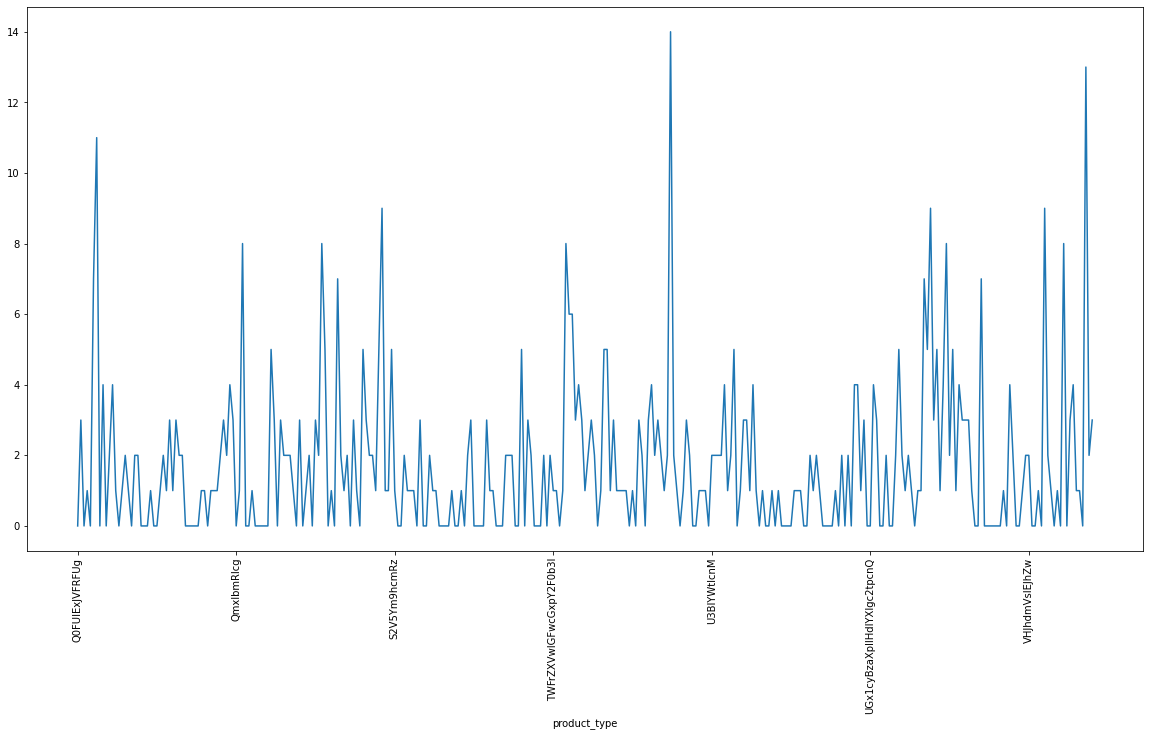

In [64]:
# Visualisation

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
df['price_string'].notnull().groupby(df['product_type']).sum().plot()
plt.xticks(rotation = 90)

In [17]:
# Count of products without prices in each Product Type

df['price_string'].isnull().groupby(df['product_type']).sum()

product_type
Q0FUIExJVFRFUg                             3
Q29mZmVlIEJlYW5z                           5
Q29mZmVlIEZpbHRlcnM                        1
Q29uZGl0aW9uZXIgSGFpcg                     2
Q29va2llcw                                 3
                                          ..
cGV0IEJsYW5rZXQ                            1
cGV0IFN0YWluIGFuZCBvZG9yIGVsaW1pbmF0b3I    1
d29tZW5zIE91dGVyd2Vhcg                     2
d29tZW5zIFdhbGxldA                         1
d29tZW5zIHN3ZWF0ZXJz                       9
Name: price_string, Length: 321, dtype: int64

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, 'V29tZW5zIFNoaXJ0cw'),
  Text(0.0, 0, 'Q0FUIExJVFRFUg'),
  Text(50.0, 0, 'QmxlbmRlcg'),
  Text(100.0, 0, 'S2V5Ym9hcmRz'),
  Text(150.0, 0, 'TWFrZXVwIGFwcGxpY2F0b3I'),
  Text(200.0, 0, 'U3BlYWtlcnM'),
  Text(250.0, 0, 'UGx1cyBzaXplIHdlYXIgc2tpcnQ'),
  Text(300.0, 0, 'VHJhdmVsIEJhZw'),
  Text(350.0, 0, '')])

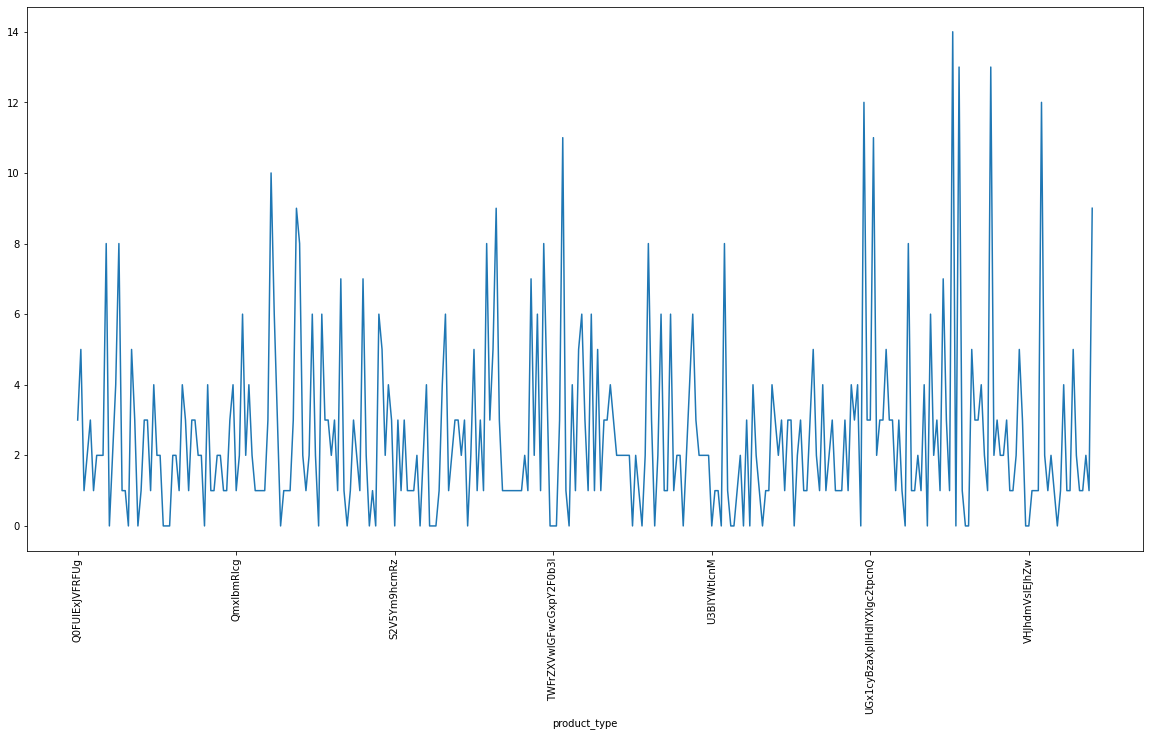

In [63]:
# Visualisation

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
df['price_string'].isnull().groupby(df['product_type']).sum().plot()
plt.xticks(rotation = 90)

### b) Count of products  without and with prices in each Category

In [19]:
# Count of products with prices in each Category

df.groupby(df['category'])['price_string'].count()

category
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       186
QXJ0IHN1cHBsaWVz                        19
QmFieWNhcmU                              9
RWxlY3Ryb25pY3M                         11
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          70
SGVhbHRo                                29
VG95cyBhbmQgR2FtZXM                     19
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     20
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        75
Z3JvY2VyaWVz                            48
a2l0Y2hpbmcgYW5kIGRpbmluZw              34
b2ZmaWNlIHByb2R1Y3Rz                    15
cGV0IHN1cHBsaWVz                        16
Name: price_string, dtype: int64

<AxesSubplot:xlabel='category'>

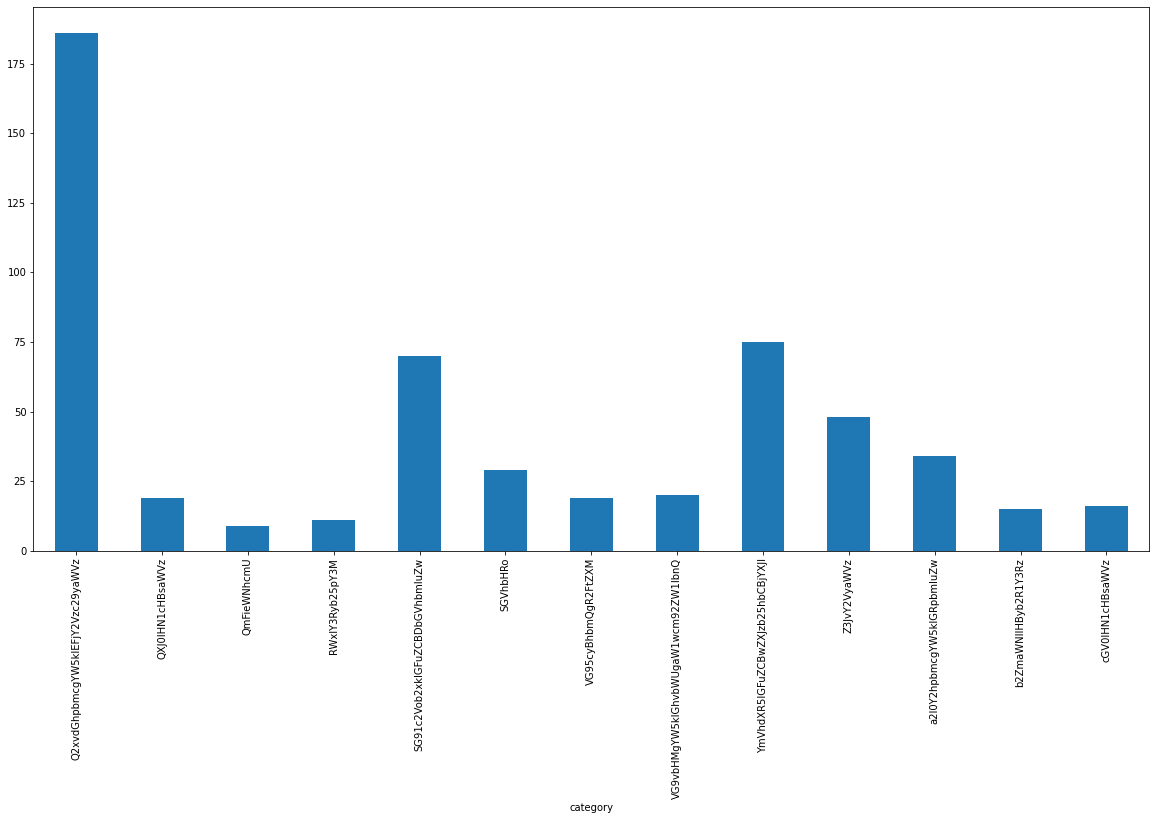

In [65]:
# Visualisation

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
df.groupby(df['category'])['price_string'].count().plot(kind='bar')
# plt.xticks(rotation = 90)

In [20]:
# Count of products without prices in each Category

df['price_string'].isnull().groupby(df['category']).sum()

category
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       205
QXJ0IHN1cHBsaWVz                        13
QmFieWNhcmU                             57
RWxlY3Ryb25pY3M                         21
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          87
SGVhbHRo                                70
VG95cyBhbmQgR2FtZXM                     60
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     32
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        72
Z3JvY2VyaWVz                           113
a2l0Y2hpbmcgYW5kIGRpbmluZw              25
b2ZmaWNlIHByb2R1Y3Rz                     8
cGV0IHN1cHBsaWVz                        58
Name: price_string, dtype: int64

<AxesSubplot:xlabel='category'>

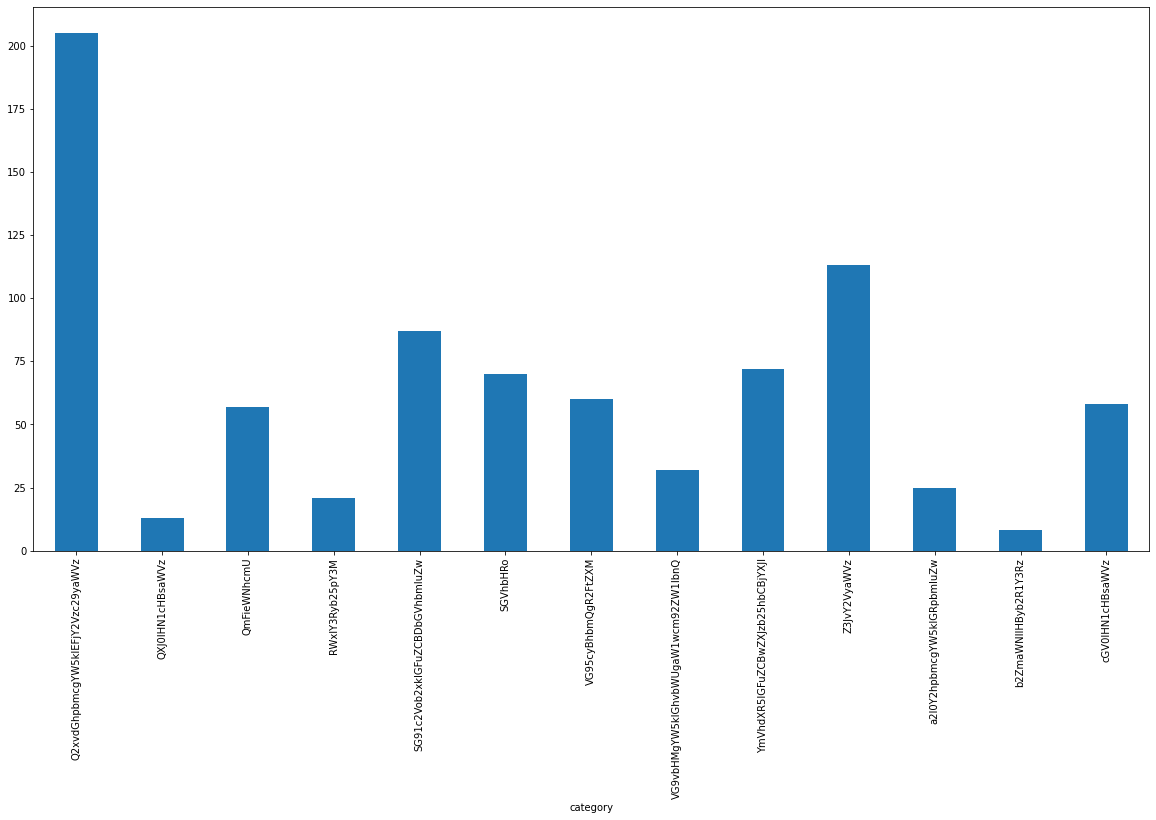

In [66]:
# Visualisation

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
df['price_string'].isnull().groupby(df['category']).sum().plot(kind='bar')
# plt.xticks(rotation = 90)

### c) Count of products  without and with prices in each Level 1

In [22]:
# Count of products with prices in each Level 1

df.groupby(df['level_1'])['price_string'].count()

level_1
MTAgQ3Vw              1
MjAgQ3Vw              1
MjAgUGludHM           1
MzAgQ3Vw              1
MzAtIDM1IFBpbnRz      1
                     ..
d29tZW5zIGJvb3Rz      2
d29tZW5zIGhlZWxz      1
eW9nYSBCbG9ja3M       2
eW9nYSBib2xzdGVycw    1
eW9nYSBzdHJhcHM       3
Name: price_string, Length: 595, dtype: int64

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(-100.0, 0, 'V2hpdGUgSmFzbWluZSBSaWNl'),
  Text(0.0, 0, 'MTAgQ3Vw'),
  Text(100.0, 0, 'QmlraW5pIFRvcHMgU3dpbXN1aXQ'),
  Text(200.0, 0, 'RmFjZSBQcmltZXI'),
  Text(300.0, 0, 'TWVkaXVtIHNhbHNh'),
  Text(400.0, 0, 'UG90IHNjcnVicw'),
  Text(500.0, 0, 'VG90ZSBiYWdz'),
  Text(600.0, 0, ''),
  Text(700.0, 0, '')])

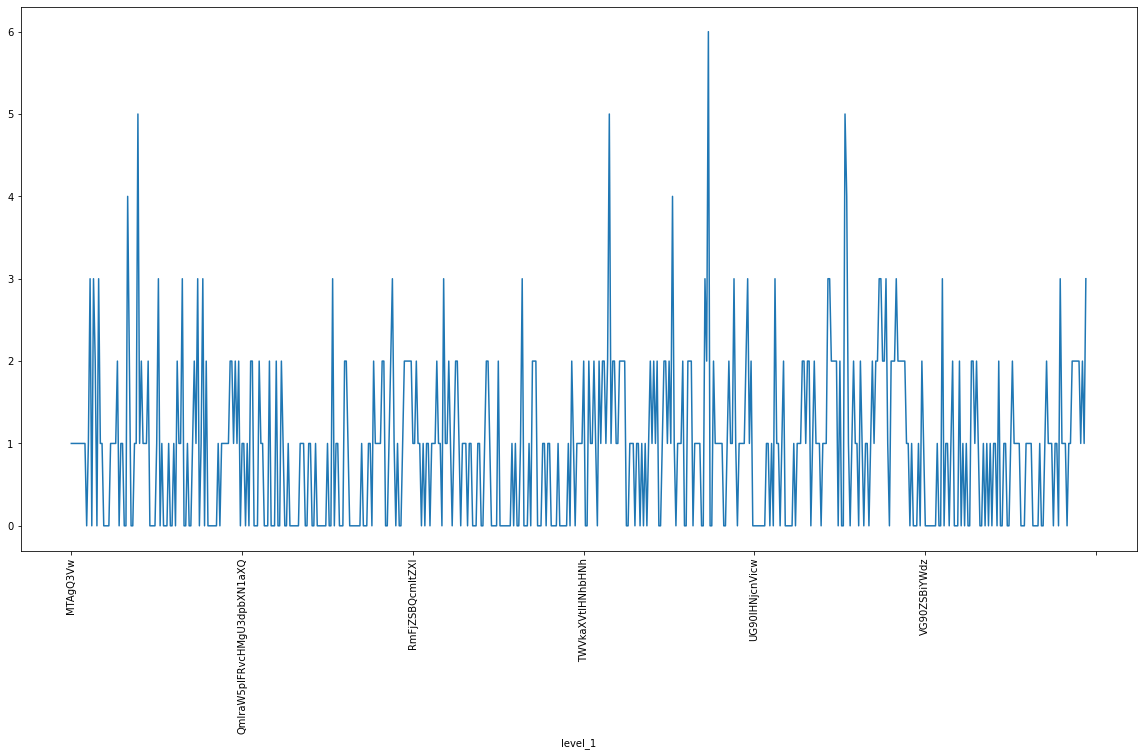

In [62]:
# Visualisation

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
df.groupby(df['level_1'])['price_string'].count().plot()
plt.xticks(rotation = 90)

In [23]:
# Count of products without prices in each Level 1

df['price_string'].isnull().groupby(df['level_1']).count()

level_1
MTAgQ3Vw              1
MjAgQ3Vw              1
MjAgUGludHM           3
MzAgQ3Vw              1
MzAtIDM1IFBpbnRz      2
                     ..
d29tZW5zIGJvb3Rz      4
d29tZW5zIGhlZWxz      1
eW9nYSBCbG9ja3M       3
eW9nYSBib2xzdGVycw    2
eW9nYSBzdHJhcHM       3
Name: price_string, Length: 595, dtype: int64

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(-100.0, 0, 'V2hpdGUgSmFzbWluZSBSaWNl'),
  Text(0.0, 0, 'MTAgQ3Vw'),
  Text(100.0, 0, 'QmlraW5pIFRvcHMgU3dpbXN1aXQ'),
  Text(200.0, 0, 'RmFjZSBQcmltZXI'),
  Text(300.0, 0, 'TWVkaXVtIHNhbHNh'),
  Text(400.0, 0, 'UG90IHNjcnVicw'),
  Text(500.0, 0, 'VG90ZSBiYWdz'),
  Text(600.0, 0, ''),
  Text(700.0, 0, '')])

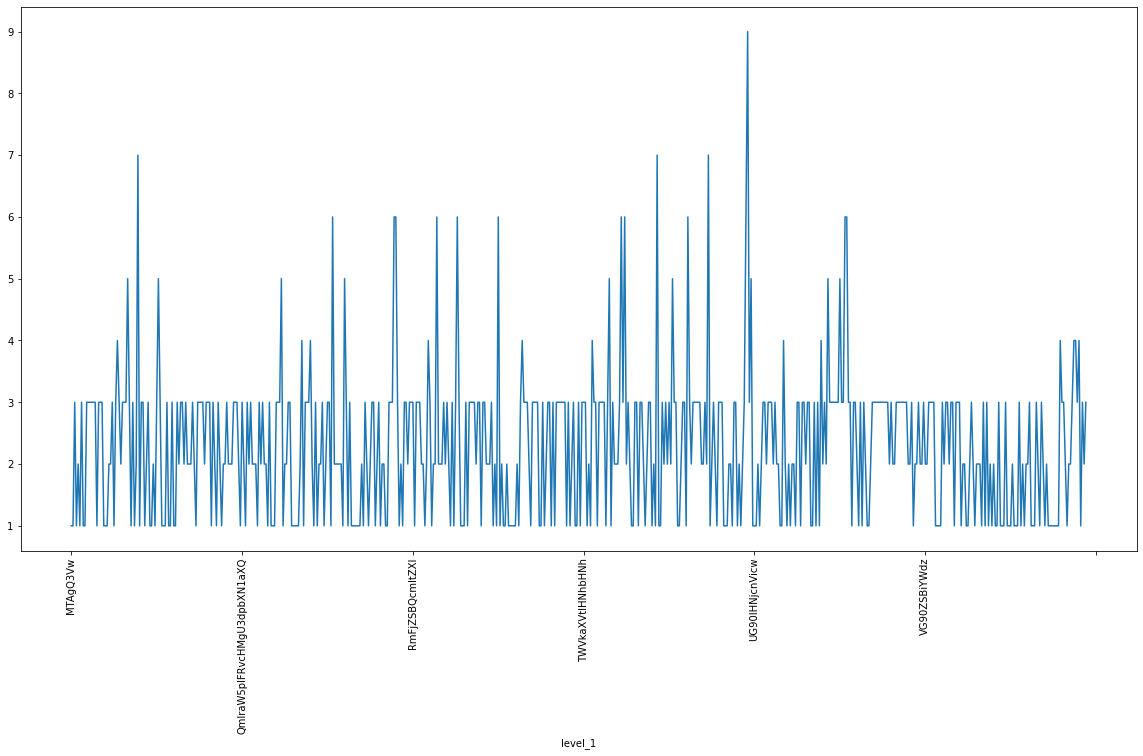

In [61]:
# Visualisation

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
df['price_string'].isnull().groupby(df['level_1']).count().plot()
plt.xticks(rotation = 90)

In [200]:
# df.drop(columns=['Currency', 'value'], inplace=True)

### Task 3. Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns. 

#### Correcting Product prices in the correct format

In [24]:
df['price_string'] = np.where(df['price_string'].isnull(), np.nan,
                   np.where(df['price_string'].str[0]=='$', df['price_string'],
                   np.where(df['price_string'].str[0]!='$', '$' + df['price_string'].astype(str), None)))

In [ ]:
df

#### Separating price_string into currency column and value column

In [30]:
df['currency'] = np.where(df['price_string'].isnull(), np.nan,
                   np.where(df['price_string'].str[0]=='$', "$", None))

In [31]:
df['value'] = np.where(df['price_string'].isnull(), np.nan,
                   np.where(df['price_string'].str[0]=='$', df['price_string'].str[1:], None))

In [32]:
df

,uuid,price_string,price_string_unf,product_type,level_1,category,currency,value
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,NaN,NaN
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,NaN,NaN
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,$,19.95
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,$,92.00
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,$11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,$,11.50
...,...,...,...,...,...,...,...,...
7751,a1170e06-ec36-4530-82a2-0374969a059e,$14.49,NaN,Q29va2luZyBPaWw,Q29jb251dCBPaWw,Z3JvY2VyaWVz,$,14.49
8538,b282d3e4-9d7a-48c9-9d68-4856c51f545b,$12.99,NaN,UGV0IFNoYW1wb28vQ29uZGl0aW9uZXI,UHVwcHkgU2hhbXBvbw,cGV0IHN1cHBsaWVz,$,12.99
8788,62785956-705e-47db-bd0e-764575333724,NaN,NaN,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFNob3J0IHNsZWV2ZSB0ZWU,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,NaN,NaN
8873,b4799645-56ab-4b83-8666-1b79cbf6da17,NaN,NaN,WW9nYSBNYXRz,RWNvIGZyaWVuZGx5IHlvZ2EgbWF0cw,SGVhbHRo,NaN,NaN


### Task 4. List out the categories with average price of product. 

In [33]:
df.dtypes

uuid                object
price_string        object
price_string_unf    object
product_type        object
level_1             object
category            object
currency            object
value               object
dtype: object

*Since there are null values also present in values(price) column so we cannot calculate mean out of it.*
*We need to convert null into 0.*
*But I don't want to manipulate value column so I will be copying entries of value column into new temporary column temp, and will use it calculate average.*

In [34]:
df['temp'] = df['value']
df['temp']

0          NaN
1          NaN
2        19.95
3        92.00
4        11.50
         ...  
7751     14.49
8538     12.99
8788       NaN
8873       NaN
13511    58.00
Name: temp, Length: 1373, dtype: object

In [35]:
# Replacing NaN with 0
df['temp'] = df['temp'].fillna(0).astype(float)
df['temp']

0         0.00
1         0.00
2        19.95
3        92.00
4        11.50
         ...  
7751     14.49
8538     12.99
8788      0.00
8873      0.00
13511    58.00
Name: temp, Length: 1373, dtype: float64

In [36]:
# Categories with avg price of product
df.groupby(df['category'])['temp'].mean()

category
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       59.659795
QXJ0IHN1cHBsaWVz                       11.560937
QmFieWNhcmU                            22.321212
RWxlY3Ryb25pY3M                        20.713750
SG91c2Vob2xkIGFuZCBDbGVhbmluZw         33.974076
SGVhbHRo                                9.537071
VG95cyBhbmQgR2FtZXM                     7.804177
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ    31.624423
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl       17.727075
Z3JvY2VyaWVz                            3.142857
a2l0Y2hpbmcgYW5kIGRpbmluZw              9.625593
b2ZmaWNlIHByb2R1Y3Rz                   13.356522
cGV0IHN1cHBsaWVz                        3.066351
Name: temp, dtype: float64

<AxesSubplot:xlabel='category'>

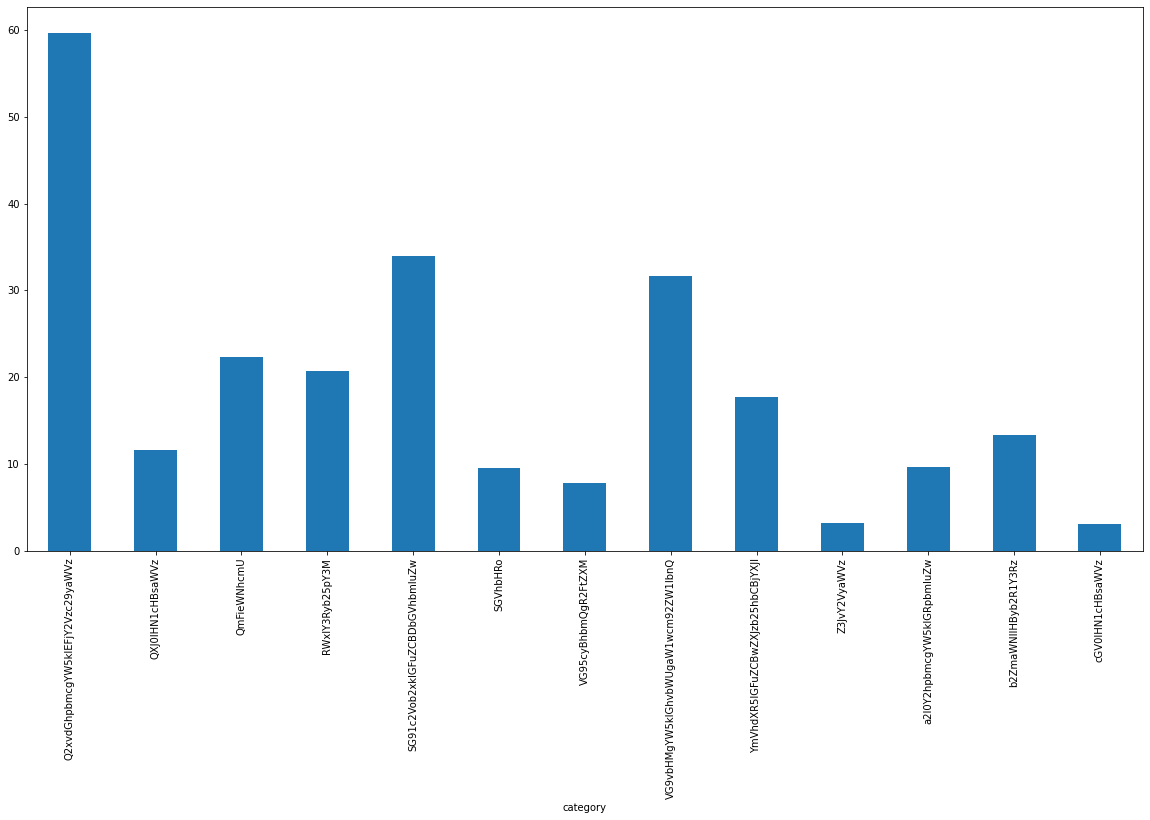

In [67]:
# Visualisation of categories with avg price of product

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
df.groupby(df['category'])['temp'].mean().plot(kind='bar')

In [38]:
# Uncomment next line to save dataframe into csv file
# df.to_csv('output.csv')